In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('sydney_transportation.xlsx')

In [3]:
df.head()

,cartime,carcost,traintime,traincost,choice
0,70,50,64,39,0
1,50,230,60,32,0
2,50,70,58,40,1
3,60,108,93,62,1
4,70,60,68,26,0


In [4]:
df.describe()

,cartime,carcost,traintime,traincost,choice
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,45.465465,57.753754,66.321321,38.219219,0.549550
std,18.308670,33.551875,19.296561,14.497507,0.498288
min,10.000000,8.000000,3.000000,7.000000,0.000000
25%,30.000000,32.000000,56.000000,28.000000,0.000000
50%,45.000000,50.000000,67.000000,36.000000,1.000000
75%,60.000000,70.000000,76.000000,46.000000,1.000000
max,95.000000,230.000000,145.000000,97.000000,1.000000


In [5]:
df.isna().sum()

cartime      0
carcost      0
traintime    0
traincost    0
choice       0
dtype: int64

In [7]:
df.shape

(333, 5)

In [26]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


c:\Users\dell pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


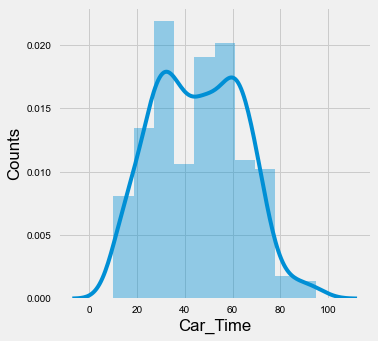

In [91]:
plt.figure(figsize=(5,5))
plt.style.use('fivethirtyeight')
#plt.hist(df['cartime'],bins = 15)
sns.distplot(x=df.cartime, hist= True)
plt.xlabel('Car_Time')
plt.ylabel('Counts')
plt.show()

In [92]:
import numpy as np
arr = np.random.randint(100,size=(15))
print(arr)

[20 91 84 38 93 32 76 50 96 81 71 48 85  0 48]


In [93]:
from sklearn import preprocessing
normalized = preprocessing.normalize(df.cartime)

ValueError: Expected 2D array, got 1D array instead:
array=[70. 50. 50. 60. 70. 20. 40. 15. 60. 29. 36. 50. 63. 20. 60. 30. 47. 60.
 55. 35. 15. 55. 50. 39. 17. 35. 65. 38. 15. 65. 40. 15. 55. 25. 75. 25.
 61. 15. 15. 35. 50. 65. 40. 60. 35. 20. 31. 35. 34. 65. 45. 59. 58. 55.
 26. 50. 12. 15. 45. 69. 20. 32. 60. 22. 65. 12. 25. 60. 30. 38. 21. 30.
 26. 35. 35. 25. 40. 65. 31. 30. 30. 25. 15. 30. 14. 65. 70. 28. 55. 50.
 65. 25. 50. 32. 43. 27. 35. 69. 85. 45. 50. 32. 50. 45. 35. 70. 30. 25.
 40. 30. 50. 25. 90. 75. 30. 45. 20. 60. 45. 45. 70. 20. 25. 40. 25. 40.
 75. 55. 50. 75. 95. 22. 48. 35. 60. 47. 53. 62. 55. 30. 25. 25. 60. 60.
 60. 53. 30. 25. 60. 25. 55. 70. 50. 45. 30. 30. 70. 60. 30. 35. 60. 50.
 65. 60. 47. 50. 85. 65. 43. 70. 38. 46. 70. 15. 45. 70. 30. 50. 46. 10.
 40. 55. 45. 20. 60. 60. 55. 65. 45. 37. 70. 40. 25. 35. 35. 12. 45. 23.
 30. 37. 35. 60. 65. 30. 65. 40. 70. 70. 65. 50. 60. 95. 50. 13. 70. 65.
 35. 55. 35. 40. 35. 34. 50. 80. 13. 50. 25. 33. 55. 45. 30. 35. 63. 70.
 20. 91. 55. 40. 40. 65. 50. 37. 60. 62. 26. 55. 60. 20. 30. 25. 35. 45.
 37. 60. 43. 15. 28. 70. 17. 45. 45. 55. 60. 60. 35. 51. 68. 22. 15. 58.
 40. 70. 30. 15. 80. 50. 45. 45. 70. 61. 60. 70. 75. 30. 60. 40. 30. 30.
 55. 30. 75. 60. 46. 70. 52. 40. 60. 30. 15. 30. 70. 85. 60. 65. 40. 50.
 75. 30. 60. 60. 68. 65. 65. 37. 45. 65. 60. 55. 60. 65. 50. 75. 35. 15.
 53. 25. 45. 25. 27. 25. 50. 25. 35.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [95]:
x = np.array([2.0 , 2.4, 1.5, 3.5, 3.5, 3.5, 3.5, 3.7, 3.7])

[0      70
 1      50
 2      50
 3      60
 4      70
        ..
 328    27
 329    25
 330    50
 331    25
 332    35
 Name: cartime, Length: 333, dtype: int64]

In [97]:
x.reshape(-1,1)

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [3.7]])

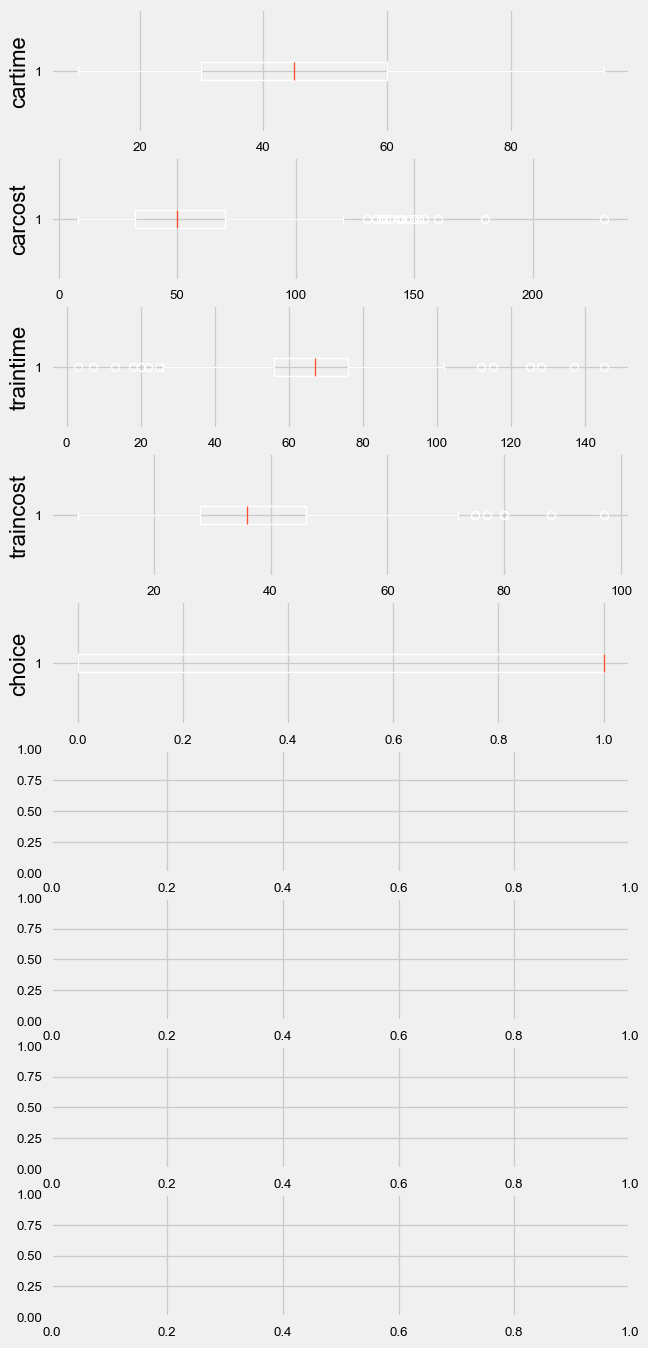

In [107]:
# Box Plots
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

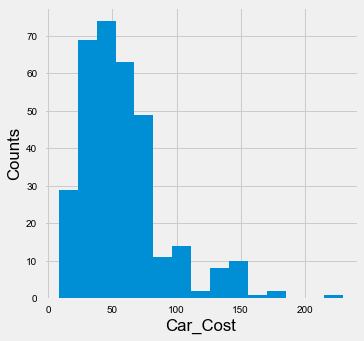

In [68]:
plt.figure(figsize=(5,5))
plt.style.use('fivethirtyeight')
plt.hist(df['carcost'],bins = 15)
plt.xlabel('Car_Cost')
plt.ylabel('Counts')
plt.show()

In [75]:
df[df['choice']==1].shape

(183, 5)

In [76]:
df[df['choice']==1]['cartime']

2      50
3      60
5      20
7      15
9      29
       ..
328    27
329    25
330    50
331    25
332    35
Name: cartime, Length: 183, dtype: int64

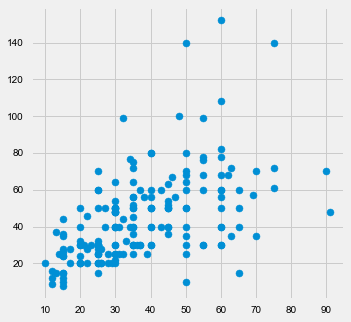

In [77]:
plt.figure(figsize=(5,5))
plt.scatter(x=df[df['choice']==1]['cartime'], y=df[df['choice']==1]['carcost'])
plt.show()

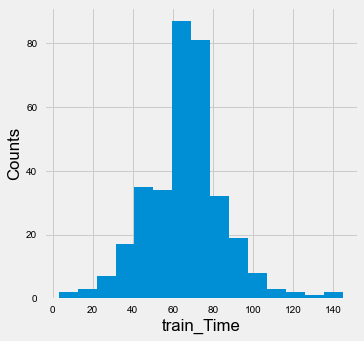

In [69]:
plt.figure(figsize=(5,5))
plt.style.use('fivethirtyeight')
plt.hist(df['traintime'],bins = 15)
plt.xlabel('train_Time')
plt.ylabel('Counts')
plt.show()

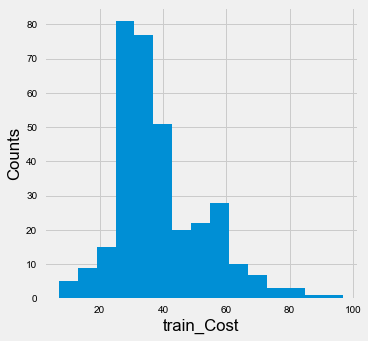

In [70]:
plt.figure(figsize=(5,5))
plt.style.use('fivethirtyeight')
plt.hist(df['traincost'],bins = 15)
plt.xlabel('train_Cost')
plt.ylabel('Counts')
plt.show()

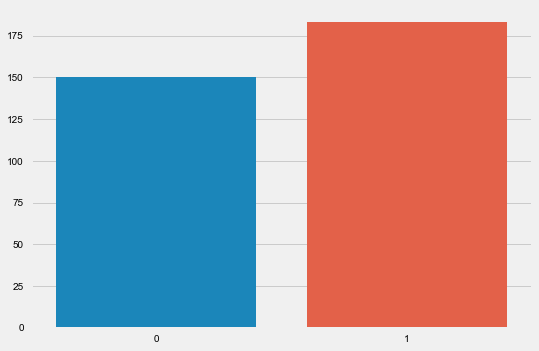

In [67]:
sns.barplot(x = target.index.tolist() , y = target.values.tolist())
plt.show()

In [41]:
df.columns

Index(['cartime', 'carcost', 'traintime', 'traincost', 'choice'], dtype='object')